# **CUSTOMER CHURN IN BANKING** - NOTEBOOK 2: ML

In [1]:
#libraries import and dataset load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv('../data/raw/dataset1.csv', sep = ',')

### Preparation of dataset

In [2]:
#head
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
#Dropping columns I will not use in the model
df = df.drop(['RowNumber', 'CustomerId', 'Surname','Complain'], axis = 1)


In [4]:
#One-hot Encoder to get categorical data formatted
#hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])
#df = pd.concat([df, hot], axis = 1)
#df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [5]:
# checking
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


### Preparation of train & test

In [6]:
# Separating features and target
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,5,GOLD,425


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Satisfaction Score  10000 non-null  int64  
 11  Card Type           10000 non-null  object 
 12  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
# Transforming into train & test (30% of data to test the models)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
X_train_num = X_train.select_dtypes('number')
X_test_num  = X_test.select_dtypes('number')

X_train_cat = X_train.select_dtypes('object')
X_test_cat  = X_test.select_dtypes('object')

In [11]:
X_train_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned
7681,641,33,2,146193.60,2,1,1,55796.83,1,307
9031,541,39,7,0.00,2,1,0,19823.02,5,781
3691,590,76,5,160979.68,1,0,1,13848.58,4,924
202,516,50,5,0.00,1,0,1,146145.93,5,509
5625,508,60,7,143262.04,1,1,1,129562.74,3,727


In [12]:
# Std scaler to standarize the scale
import pickle

scaler = StandardScaler()
scaler.fit(X_train_num)

filename = "standard_scaler.pkl"
with open("../scalers/"+filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_num_scaled_np = scaler.transform(X_train_num)
X_test_num_scaled_np  = scaler.transform(X_test_num)

X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled_np, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_scaled_df  = pd.DataFrame(X_test_num_scaled_np, columns=X_test_num.columns, index=X_test_num.index)

In [13]:
X_train_cat.head()

,Geography,Gender,Card Type
7681,France,Male,DIAMOND
9031,France,Male,PLATINUM
3691,France,Female,PLATINUM
202,Spain,Male,GOLD
5625,France,Female,GOLD


In [14]:
X.select_dtypes('object').head()

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD


In [15]:
X_train_cat.head()

,Geography,Gender,Card Type
7681,France,Male,DIAMOND
9031,France,Male,PLATINUM
3691,France,Female,PLATINUM
202,Spain,Male,GOLD
5625,France,Female,GOLD


In [16]:
categorical_columns = list(X.select_dtypes('object').columns)

# Posible split de categoricas en nominales y ordinales. En este caso no hay ordinales.
categories = [ list(X[col].unique())  for col in categorical_columns ]

encoder = OneHotEncoder(categories=categories, handle_unknown="infrequent_if_exist", drop="first", sparse_output=False)
encoder.fit(X_train_cat)

filename = "encoder.pkl"
with open("../encoders/"+filename, "wb") as file:
    pickle.dump(encoder, file)

X_train_cat_encoded_np = encoder.transform(X_train_cat)
X_test_cat_encoded_np  = encoder.transform(X_test_cat)

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train_cat.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_test_cat.index)

In [17]:
X_train_proc = pd.concat([X_train_num_scaled_df, X_train_cat_encoded_df], axis=1)
X_test_proc = pd.concat([X_test_num_scaled_df, X_test_cat_encoded_df], axis=1)

In [18]:
X_train_proc.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Spain,Geography_Germany,Gender_Male,Card Type_GOLD,Card Type_SILVER,Card Type_PLATINUM
7681,-0.097921,-0.557598,-1.036351,1.132494,0.810394,0.641985,0.966835,-0.768624,-1.441401,-1.344513,0.0,0.0,1.0,0.0,0.0,0.0
9031,-1.126120,0.017259,0.697009,-1.199755,0.810394,0.641985,-1.034302,-1.393599,1.417509,0.762146,0.0,0.0,1.0,0.0,0.0,1.0
3691,-0.622303,3.562216,0.003665,1.368379,-0.929716,-1.557669,0.966835,-1.497393,0.702781,1.397699,0.0,0.0,0.0,0.0,0.0,1.0
202,-1.383170,1.071165,0.003665,-1.199755,-0.929716,-1.557669,0.966835,0.801015,1.417509,-0.446739,1.0,0.0,1.0,1.0,0.0,0.0
5625,-1.465426,2.029262,0.697009,1.085727,-0.929716,0.641985,0.966835,0.512914,-0.011946,0.522147,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#scaling the combined
combined_scaler = StandardScaler()
combined_scaler.fit(X_train_proc)

StandardScaler()

In [20]:
combined_scaler_filename = "combined_scaler.pkl"
combined_scaler_path = "../scalers/" + combined_scaler_filename
with open(combined_scaler_path, "wb") as file:
    pickle.dump(combined_scaler, file)

In [21]:
X_train_proc_scaled = pd.DataFrame(combined_scaler.transform(X_train_proc), columns=X_train_proc.columns, index=X_train_proc.index)
X_test_proc_scaled = pd.DataFrame(combined_scaler.transform(X_test_proc), columns=X_test_proc.columns, index=X_test_proc.index)

In [22]:
X_train_proc_scaled.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_Spain,Geography_Germany,Gender_Male,Card Type_GOLD,Card Type_SILVER,Card Type_PLATINUM
7681,-0.097921,-0.557598,-1.036351,1.132494,0.810394,0.641985,0.966835,-0.768624,-1.441401,-1.344513,-0.573171,-0.569872,0.922958,-0.577130,-0.582849,-0.581529
9031,-1.126120,0.017259,0.697009,-1.199755,0.810394,0.641985,-1.034302,-1.393599,1.417509,0.762146,-0.573171,-0.569872,0.922958,-0.577130,-0.582849,1.719604
3691,-0.622303,3.562216,0.003665,1.368379,-0.929716,-1.557669,0.966835,-1.497393,0.702781,1.397699,-0.573171,-0.569872,-1.083473,-0.577130,-0.582849,1.719604
202,-1.383170,1.071165,0.003665,-1.199755,-0.929716,-1.557669,0.966835,0.801015,1.417509,-0.446739,1.744679,-0.569872,0.922958,1.732711,-0.582849,-0.581529
5625,-1.465426,2.029262,0.697009,1.085727,-0.929716,0.641985,0.966835,0.512914,-0.011946,0.522147,-0.573171,-0.569872,-1.083473,1.732711,-0.582849,-0.581529


In [23]:
# Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_proc_scaled, y_train)

In [24]:
print("Before resampling:")
print(y_train.value_counts())

print("\nAfter resampling:")
print(pd.Series(y_train_resampled).value_counts())

Before resampling:
Exited
0    5584
1    1416
Name: count, dtype: int64

After resampling:
Exited
1    5584
0    5584
Name: count, dtype: int64


## ML models

#### Naive-Bayes

In [26]:
# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_proc_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

# Print evaluation metrics
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("\nNaive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("\nNaive Bayes Classification Report:")
print(class_report_nb)

Naive Bayes Accuracy: 0.709

Naive Bayes Confusion Matrix:
[[1689  689]
 [ 184  438]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2378
           1       0.39      0.70      0.50       622

    accuracy                           0.71      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.71      0.73      3000



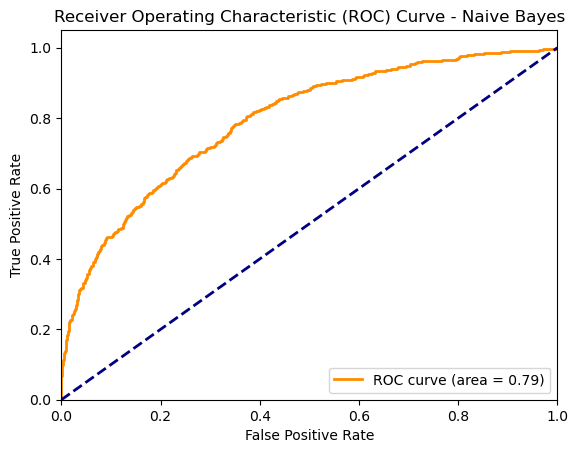

In [27]:
# Calculate the probabilities of the positive class
y_prob_nb = nb_model.predict_proba(X_test_proc_scaled)[:, 1]

# Compute ROC curve and ROC area for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [28]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Train the Random Forest model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_proc_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

Random Forest Accuracy: 0.8616666666666667

Random Forest Confusion Matrix:
[[2226  152]
 [ 263  359]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2378
           1       0.70      0.58      0.63       622

    accuracy                           0.86      3000
   macro avg       0.80      0.76      0.77      3000
weighted avg       0.85      0.86      0.86      3000



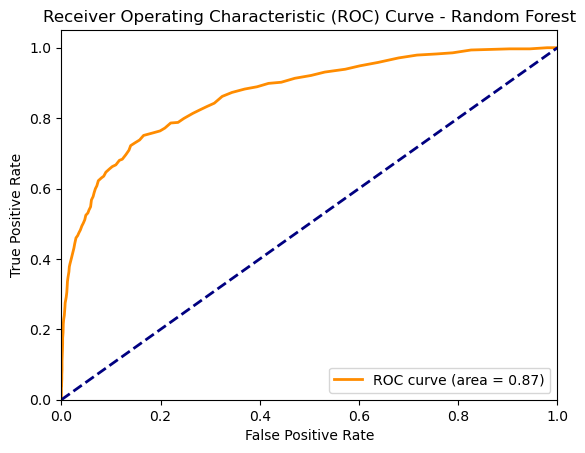

In [29]:
# Calculate the probabilities of the positive class
y_prob_rf = rf_model.predict_proba(X_test_proc_scaled)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

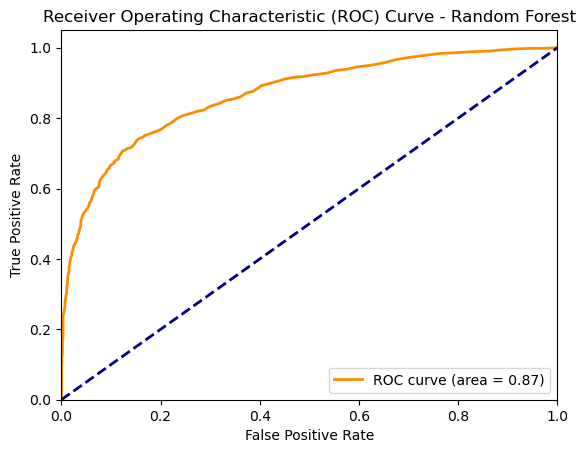

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=0)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_proc_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

# Calculate the probabilities of the positive class
y_prob_rf = best_rf_model.predict_proba(X_test_proc_scaled)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

The increase in the AUC from 0.79 to 0.87 indicates that the hyperparameter tuning process was successful and that the model's ability to distinguish between the classes has improved. This is a positive outcome and suggests that the tuned model is better suited for your classification task.

### Desition Tree

Decision Tree Accuracy: 0.7973333333333333

Decision Tree Confusion Matrix:
[[2064  314]
 [ 294  328]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2378
           1       0.51      0.53      0.52       622

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



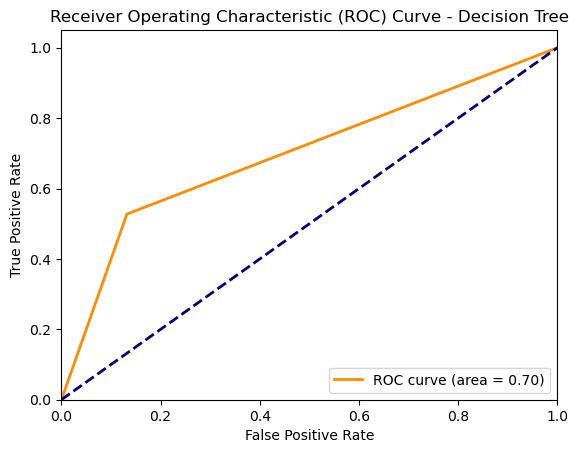

In [34]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)

# Train the Decision Tree model
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_proc_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Print evaluation metrics
print(f"Decision Tree Accuracy: {accuracy_dt}")
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_dt)
print("\nDecision Tree Classification Report:")
print(class_report_dt)

# Calculate the probabilities of the positive class
y_prob_dt = dt_model.predict_proba(X_test_proc_scaled)[:, 1]

# Compute ROC curve and ROC area for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.741

KNN Confusion Matrix:
[[1872  506]
 [ 271  351]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2378
           1       0.41      0.56      0.47       622

    accuracy                           0.74      3000
   macro avg       0.64      0.68      0.65      3000
weighted avg       0.78      0.74      0.75      3000



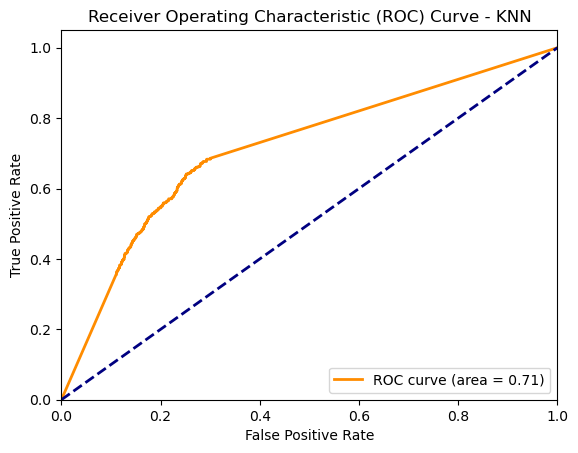

[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=11, weights=uniform; total time=   0.2s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.2s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.2s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.2s
[CV] END .metric=manhattan, 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the model with grid search
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Get the best parameters from grid search
best_params_knn = grid_search_knn.best_params_
print(f"Best parameters found for KNN: {best_params_knn}")

# Train the KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test_proc_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print evaluation metrics
print(f"KNN Accuracy: {accuracy_knn}")
print("\nKNN Confusion Matrix:")
print(conf_matrix_knn)
print("\nKNN Classification Report:")
print(class_report_knn)

# Calculate the probabilities of the positive class
y_prob_knn = best_knn_model.predict_proba(X_test_proc_scaled)[:, 1]

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

## Model Comparation

In [38]:
accuracy_nb = 0.709
roc_auc_nb = 0.79

accuracy_rf = 0.87
roc_auc_rf = 0.87

accuracy_dt = 0.79
roc_auc_dt = 0.70

accuracy_knn = 0.74
roc_auc_knn = 0.71

# Create a DataFrame to hold the comparison
comparison_table = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_nb, accuracy_rf, accuracy_dt, accuracy_knn],
    'AUC': [roc_auc_nb, roc_auc_rf, roc_auc_dt, roc_auc_knn]
})

# Set the Model column as the index
comparison_table.set_index('Model', inplace=True)

# Display the comparison table
print(comparison_table)

                     Accuracy   AUC
Model                              
Naive Bayes             0.709  0.79
Random Forest           0.870  0.87
Decision Tree           0.790  0.70
K-Nearest Neighbors     0.740  0.71


### Conclusions

**Random Forest**:

Highest Accuracy: With an accuracy of 0.870, the Random Forest model outperforms all other models in terms of accuracy.
Best AUC: The AUC of 0.87 indicates that the Random Forest model has the best performance in distinguishing between the positive and negative classes. This makes it the most reliable model among the ones tested.


**Naive Bayes**:

Moderate Performance: The Naive Bayes model has an accuracy of 0.709, which is lower than both the Decision Tree and Random Forest models.
Good AUC: With an AUC of 0.79, it shows a decent capability to distinguish between classes, better than the Decision Tree and K-Nearest Neighbors models.

**Decision Tree**:

Moderate Accuracy: The Decision Tree model has an accuracy of 0.790, which is fairly good but not as high as the Random Forest model.
Lowest AUC: An AUC of 0.70 indicates that the Decision Tree model has the least ability to distinguish between the positive and negative classes among the models tested, despite its moderate accuracy.

**K-Nearest Neighbors (KNN)**:

Lowest Accuracy: The KNN model has the lowest accuracy at 0.740.
Low AUC: An AUC of 0.71, which is better than the Decision Tree but not as good as the Naive Bayes or Random Forest models, indicating moderate performance in distinguishing between classes.
Recommendations
Random Forest is the best overall model based on both accuracy and AUC. It should be the preferred choice if the goal is to maximize both metrics.
Naive Bayes can be considered a good alternative if a simpler model is needed, especially given its relatively high AUC.
Decision Tree might not be the best choice due to its lower AUC, which indicates it struggles more with distinguishing between classes despite its decent accuracy.
K-Nearest Neighbors does not perform as well as the other models in terms of both accuracy and AUC, and thus may not be the best choice for this specific classification task.

Ensemble Model Accuracy: 0.8433333333333334

Ensemble Model Confusion Matrix:
[[2150  228]
 [ 242  380]]

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2378
           1       0.62      0.61      0.62       622

    accuracy                           0.84      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.84      0.84      0.84      3000



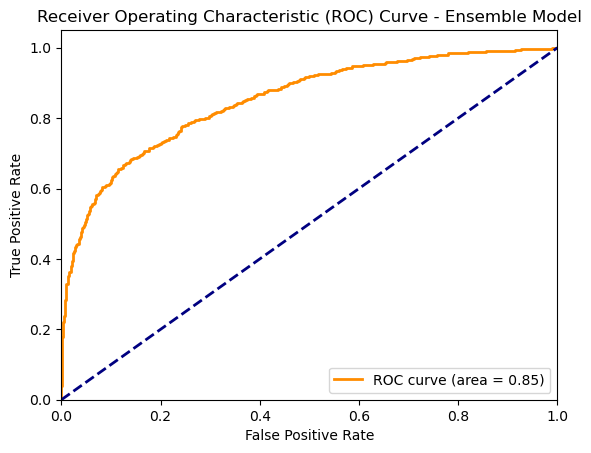

In [41]:
from sklearn.ensemble import VotingClassifier

# Initialize the individual models
rf_model = RandomForestClassifier(**best_params, random_state=0)
nb_model = GaussianNB()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('nb', nb_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_proc_scaled)

# Evaluate the model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test, y_pred_ensemble)

# Print evaluation metrics
print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print("\nEnsemble Model Confusion Matrix:")
print(conf_matrix_ensemble)
print("\nEnsemble Model Classification Report:")
print(class_report_ensemble)

# Calculate the probabilities of the positive class
y_prob_ensemble = ensemble_model.predict_proba(X_test_proc_scaled)[:, 1]

# Compute ROC curve and ROC area for Ensemble Model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_prob_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Ensemble Model')
plt.legend(loc="lower right")
plt.show()

The Random Forest model remains the best choice, as it provides higher accuracy and a comparable or better AUC.

### Chi-square test

In [45]:
from scipy.stats import chi2_contingency

# Function to perform Chi-Square test
def chi_square_test(feature, target):
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Run Chi-Square test for each categorical feature
chi_square_results = {feature: chi_square_test(feature, target) for feature in categorical_features}

# Display the results
for feature, (chi2, p) in chi_square_results.items():
    print(f'Feature: {feature}')
    print(f'Chi-Square Statistic: {chi2}')
    print(f'P-Value: {p}')
    print('---')

Feature: Geography
Chi-Square Statistic: 300.6264011211942
P-Value: 5.245736109572763e-66
---
Feature: Gender
Chi-Square Statistic: 112.39655374778587
P-Value: 2.9253677618642e-26
---
Feature: Card Type
Chi-Square Statistic: 5.053223027060927
P-Value: 0.16794112067810177
---


Geography and Gender have very low p-values, indicating a significant relationship with the target variable Exited.
Card Type has a higher p-value (0.168), indicating it is not significantly related to the target variable.

In [47]:
from sklearn.compose import ColumnTransformer
# Selecting features based on Chi-Square test results
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Geography', 'Gender']

# Splitting the dataset
X = df[selected_features]
y = df['Exited']

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Applying preprocessing to the train and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10, min_samples_leaf=2, bootstrap=True, random_state=0)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training models
rf_model.fit(X_train_transformed, y_train)
nb_model.fit(X_train_transformed, y_train)
dt_model.fit(X_train_transformed, y_train)
knn_model.fit(X_train_transformed, y_train)

# Evaluating models
models = {
    "Random Forest": rf_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model,
    "KNN": knn_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {auc:.2f}")

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('nb', nb_model)], voting='soft')
ensemble_model.fit(X_train_transformed, y_train)

# Evaluating Ensemble Model
y_pred_ensemble = ensemble_model.predict(X_test_transformed)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_model.predict_proba(X_test_transformed)[:, 1])

print(f"Ensemble Model - Accuracy: {accuracy_ensemble:.2f}, AUC: {roc_auc_ensemble:.2f}")

Random Forest - Accuracy: 0.87, AUC: 0.87
Naive Bayes - Accuracy: 0.82, AUC: 0.79
Decision Tree - Accuracy: 0.80, AUC: 0.71
KNN - Accuracy: 0.84, AUC: 0.78
Ensemble Model - Accuracy: 0.86, AUC: 0.85


Random Forest remains the best model overall, given its highest accuracy and AUC.
The Ensemble Model (combining Random Forest and Naive Bayes) performs very well, with only slightly lower metrics than the Random Forest alone. This suggests that the ensemble approach is robust and can be considered as a reliable model.

## API integration of Random Forest

In [48]:
import joblib
from flask import Flask, request, jsonify